# Assignment

In [16]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [18]:
# Load the dataset directly from dataset.csv
df = pd.read_csv('dataset.csv')

# Print the first lines of the dataset
print(df.head())

# Verify number of lines and columns of dataset
total_lines, total_columns = df.shape

# Print the total number of lines
print(f"Total number of lines is: {total_lines}")


   Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  41      2699                347      3                             0   
1  52      2739                323     25                            85   
2  53      2696                 72      2                            30   
3  56      2722                315     24                            30   
4  68      2919                 13     13                            90   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                           0                             2096   
1                          43                             3118   
2                           0                             3271   
3                          19                             3216   
4                           6                             5321   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              213               234               159   
1              149               205

## Exploratory Analisys



<Figure size 1500x1000 with 0 Axes>

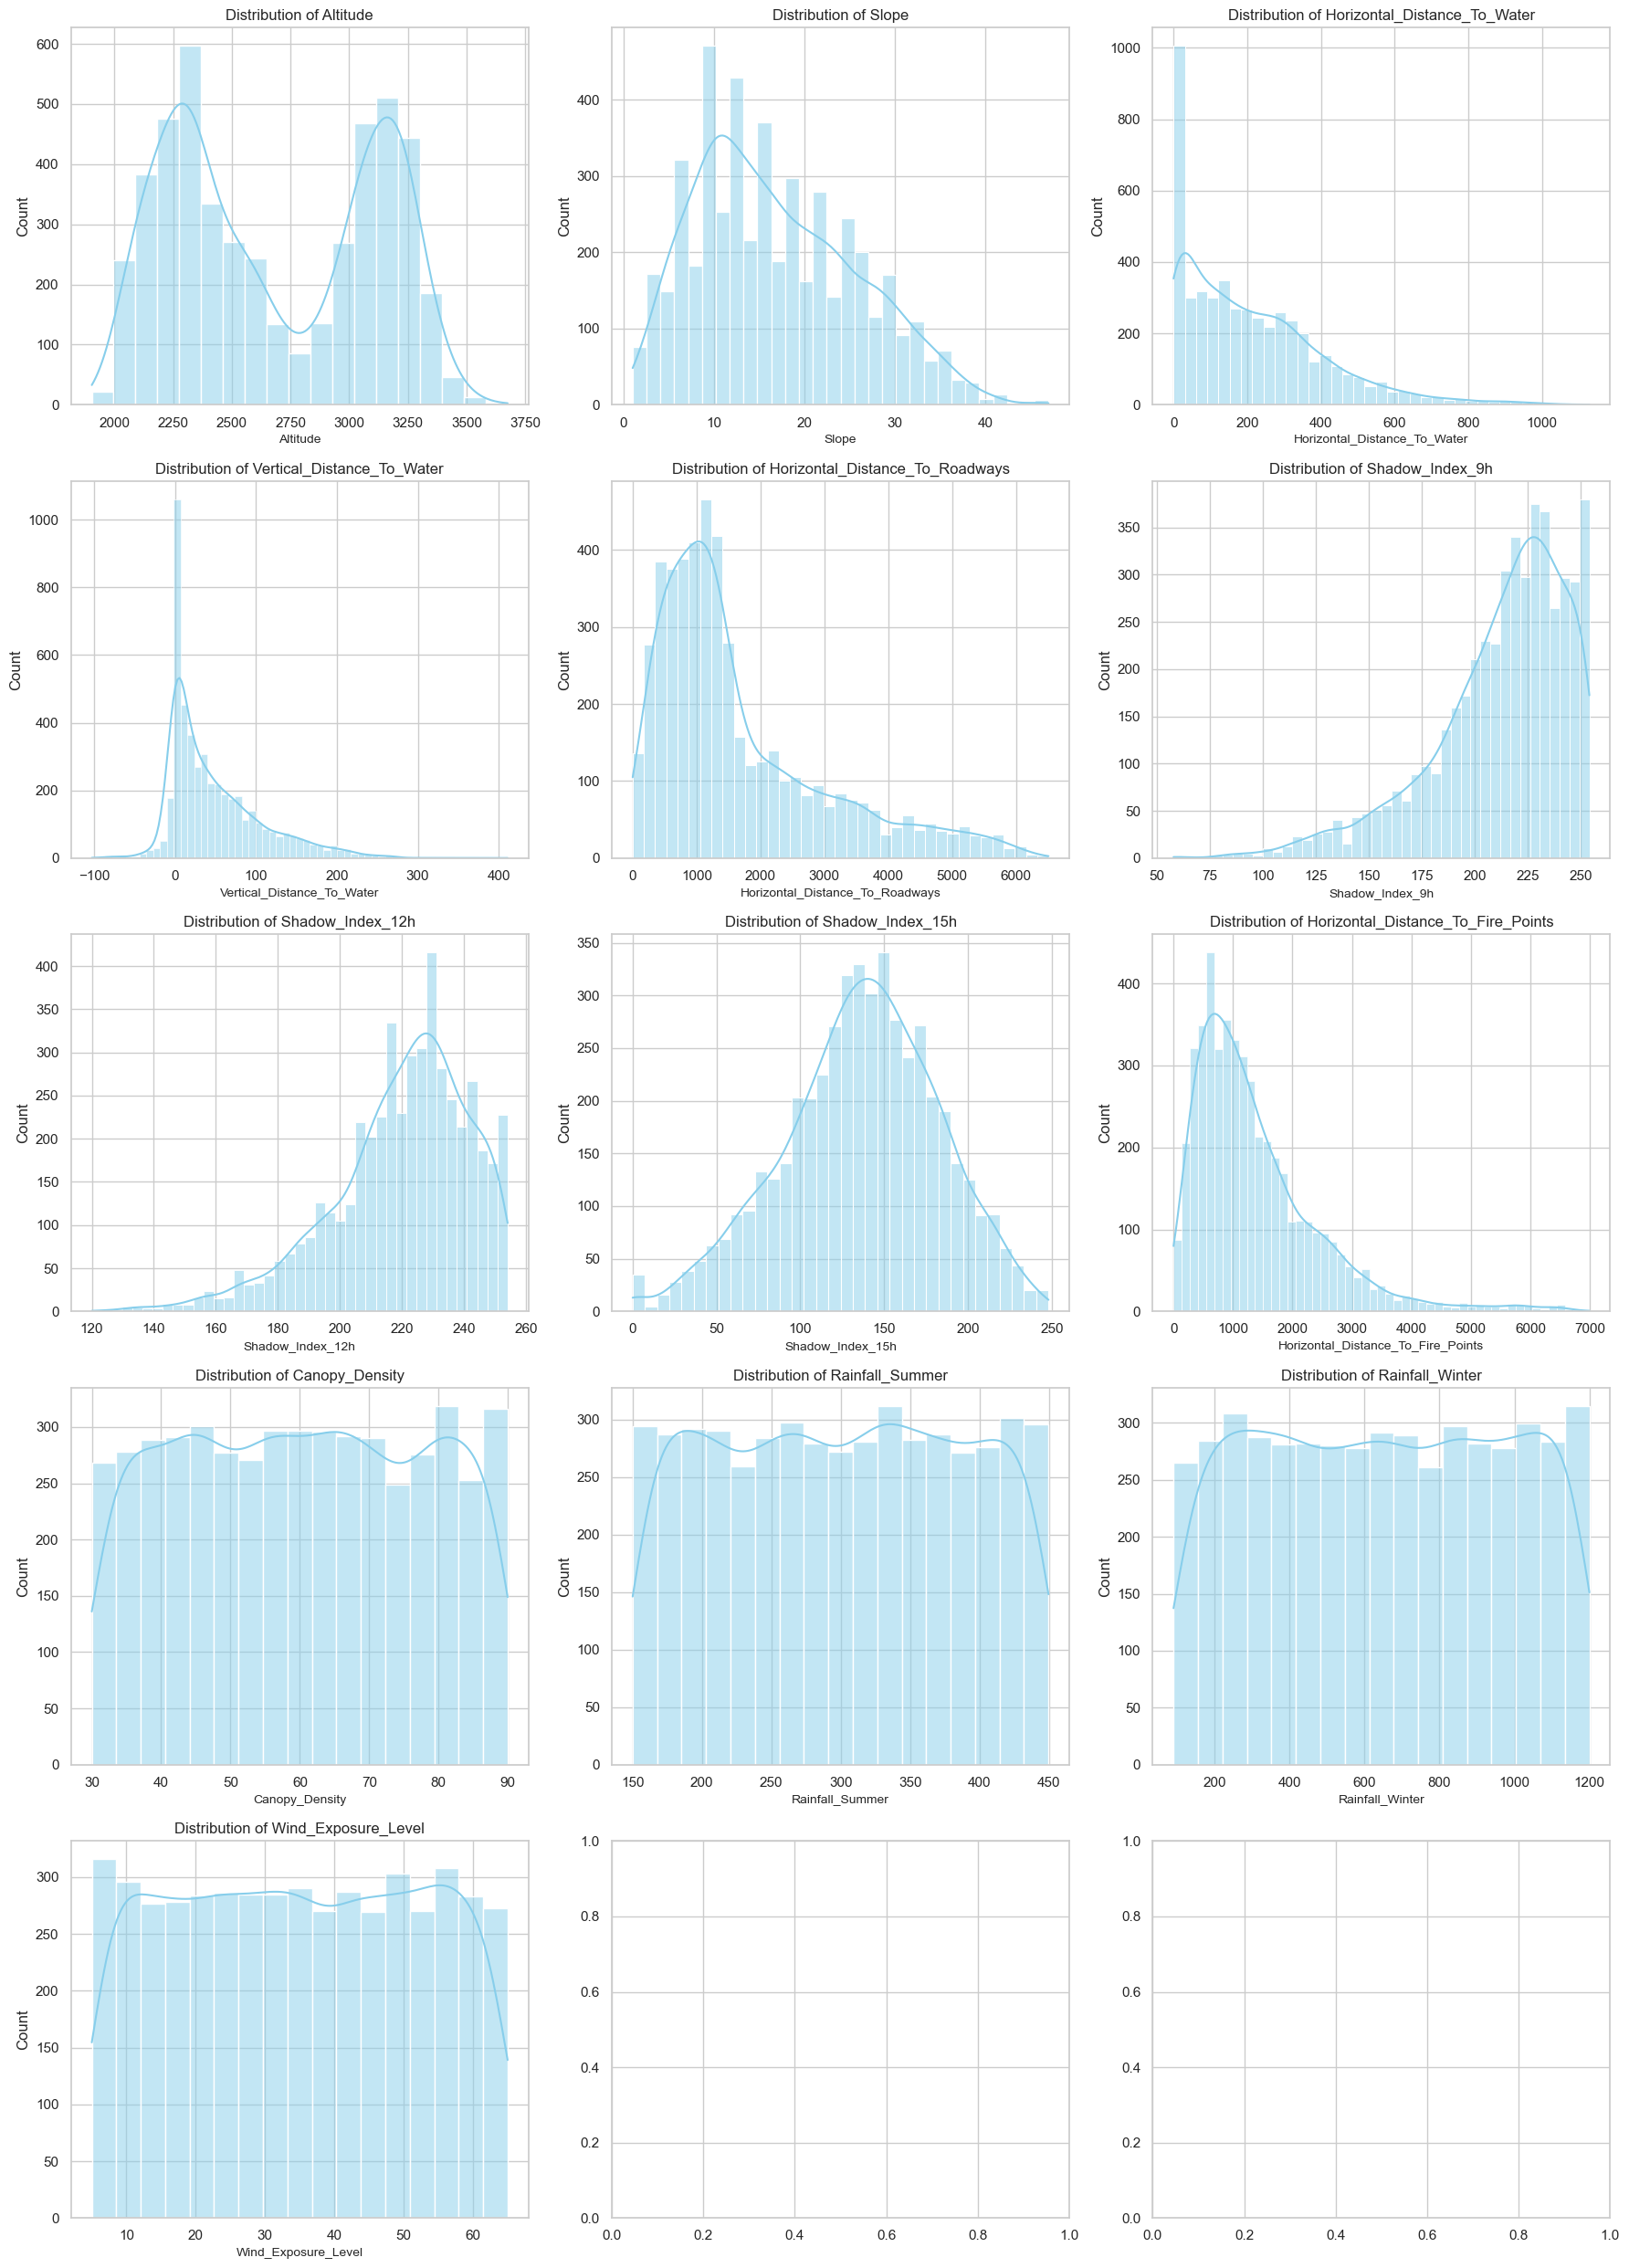

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,7666.403704,2683.500000,158.631687,16.802058,214.393416,48.723045,1672.105967,212.081070,219.67037,135.989918,1380.929835,60.122060,300.047944,648.913975,34.824609
std,4281.430130,433.403686,108.727205,8.866688,191.544909,58.133507,1345.791832,32.478175,22.45307,46.829938,1066.892197,17.278688,86.976939,322.266228,17.434933
min,41.000000,1903.000000,0.000000,1.000000,0.000000,-103.000000,0.000000,58.000000,120.00000,0.000000,0.000000,30.000000,150.070000,90.020000,5.000000
25%,3963.750000,2292.000000,68.000000,10.000000,60.000000,4.000000,726.000000,196.000000,208.00000,106.750000,633.000000,45.130000,223.547500,367.205000,19.620000
50%,7463.500000,2596.500000,129.000000,15.000000,175.000000,30.000000,1231.000000,219.000000,223.00000,138.000000,1110.000000,60.190000,301.085000,648.915000,34.660000
75%,11321.500000,3112.000000,261.000000,23.000000,323.000000,76.000000,2244.000000,236.000000,236.00000,169.000000,1816.000000,75.130000,374.652500,929.935000,50.060000
max,15118.000000,3675.000000,360.000000,47.000000,1129.000000,411.000000,6508.000000,254.000000,254.00000,248.000000,6993.000000,89.960000,449.790000,1199.970000,65.000000


In [19]:
# Exploratory Analisys of Data

# Graphs Configuration
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Inicial Statistic Resume of Numeric Variabels
summary_stats = df.describe()

# Plotting histograms of the main numerical variables
numerical_cols = ['Altitude', 'Slope', 'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water',
                  'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 'Shadow_Index_12h', 
                  'Shadow_Index_15h', 'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                  'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Creating subplots to visualize distributions
fig, axes = plt.subplots(5, 3, figsize=(18, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

summary_stats

## Correlation Matrix - Continuous vs Continuous

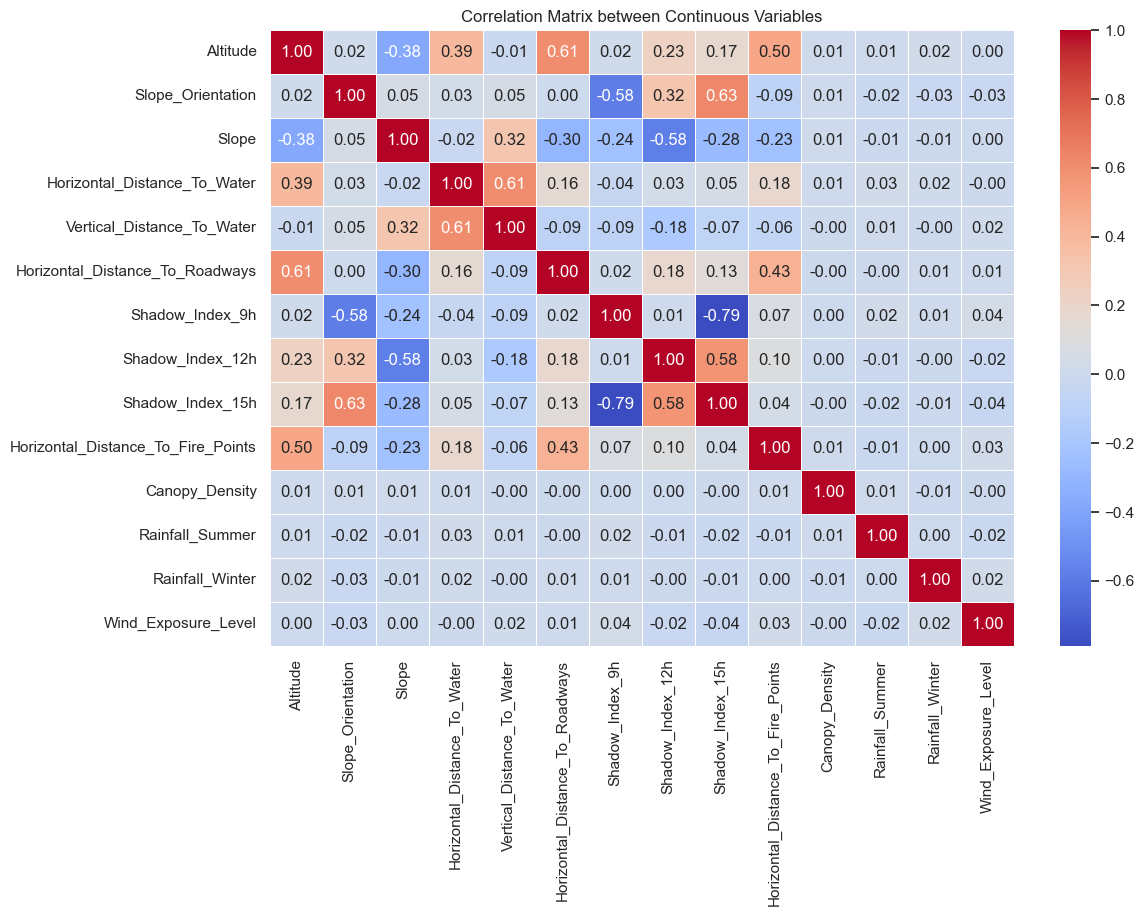

In [20]:
continuous_var = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                       'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways', 
                       'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h', 
                       'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 'Rainfall_Summer', 
                       'Rainfall_Winter', 'Wind_Exposure_Level']

df_continuous = df[continuous_var]

# Calculating the correlation matrix
correlation_matrix = df_continuous.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))  # figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Graph
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

## Correlation Matrix Analysis

The correlation matrix visualized in the heatmap above allows you to identify the strength and direction of the linear relationship between the continuous variables in your dataset.

The correlation matrix allows for the identification of several potential relationships:

**Strong Positive Correlations:**

* **Horizontal_Distance_To_Roadways and Altitude (0.61):** A moderate positive correlation suggests that higher altitude locations tend to be further from roadways.

* **Shadow_Index_9h and Shadow_Index_15h (0.79):** A strong positive correlation indicates a direct relationship between shadow levels at 9h and 15h, possibly reflecting the terrain's inclination in relation to the sun's position.

**Strong Negative Correlations:**
* **Shadow_Index_9h and Shadow_Index_15h (-0.79):** This negative correlation reflects the shift in shadow orientation throughout the day, likely due to changes in the sun’s position.
* **Slope_Orientation and Shadow_Index_9h (-0.58):** This suggests that the orientation of the slope can influence the amount of shadow observed at 9h.

**Low or No Correlation:**
* Variables such as Rainfall_Summer and Rainfall_Winter exhibit low correlations with other variables, suggesting that rainfall patterns are independent of the geographic factors considered in this analysis.
* Wind_Exposure_Level shows no significant correlation with the other variables, indicating that wind exposure may be influenced by factors not present in this dataset.

Furthermore, the analysis reveals that variables with strong correlations may be redundant in predictive models, potentially allowing for the removal of one of the highly correlated variables without loss of information. Collinearity analysis also assists in identifying variables that could cause issues in statistical models, such as logistic regression, thus supporting more efficient variable selection.

# Logistic Regression

In [21]:
warnings.filterwarnings("ignore", category=FutureWarning) # to ignore the warnings

# Separating the data between features (X) and target (y)
X = df.drop('Vegetation_Type', axis=1)  # Classification of Vegetation Type
y = df['Vegetation_Type']

X_encoded = pd.get_dummies(X, drop_first=True)  # Converting categorical variables

# Data scaling for numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Dividing the data into training and test (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model with class balancing
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced')

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating performance with appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0) # Correcting an error

# Displaying the results
print('----- Normal Logistic Regression -----\n')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Stratified Cross Validation (StratifiedKFold)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

print(f'Cross Validation Accuracy (k=5): {np.mean(cv_scores_5)}')
print(f'Cross Validation Accuracy (k=10): {np.mean(cv_scores_10)}\n')


# Average F1-Score in cross-validation
f1_cv_scores_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')

print(f'Cross Validation F1-Score (k=5): {np.mean(f1_cv_scores_5)}')
print(f'Cross Validation F1-Score (k=10): {np.mean(f1_cv_scores_10)}\n') 

# Leave-One-Out Cross Validation
loo = LeaveOneOut()

# Obtain the accuracy scores for each LOOCV iteration
loo_scores = cross_val_score(log_reg, X_scaled, y, cv=loo, scoring='accuracy')

# Display average LOOCV scores
print(f'LOOCV Accuracy: {np.mean(loo_scores)}\n')

n_iterations = 1000  # Number of samples bootstrap
n_size = int(len(X_scaled) * 0.8)  # Sample size (80% of data)
bootstrap_scores = []

for i in range(n_iterations):
    # Create a bootstrap sample
    X_resampled, y_resampled = resample(X_scaled, y, n_samples=n_size, random_state=i)

    # Train the logistic regression model with the resampled data
    log_reg.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the original data (or on a test set)
    y_pred_bootstrap = log_reg.predict(X_test)
    
    # Calculate the accuracy for this bootstrap sample
    bootstrap_accuracy = accuracy_score(y_test, y_pred_bootstrap)
    bootstrap_scores.append(bootstrap_accuracy)

# Display the average accuracy and confidence interval (95%) of the bootstrap samples
mean_bootstrap_score = np.mean(bootstrap_scores)
confidence_interval = np.percentile(bootstrap_scores, [2.5, 95])

print(f'Bootstrap Accuracy: {mean_bootstrap_score}')
print(f'95% Confidence Interval: {confidence_interval}')

# Initializing Logistic Regression with Ridge regularization (penalty='l2')
ridge_log_reg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight='balanced')

# Training the model (Ridge Logistic Regression)
ridge_log_reg.fit(X_train, y_train)

# Making predictions on the test set (Ridge Logistic Regression)
y_pred_ridge = ridge_log_reg.predict(X_test)

# Evaluating performance of Ridge Logistic Regression
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
class_report_ridge = classification_report(y_test, y_pred_ridge, zero_division=0)

# Initializing Logistic Regression with Lasso regularization (penalty='l1')
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced')

# Training the model (Lasso Logistic Regression)
lasso_log_reg.fit(X_train, y_train)

# Making predictions on the test set (Lasso Logistic Regression)
y_pred_lasso = lasso_log_reg.predict(X_test)

# Evaluating performance of Lasso Logistic Regression
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
class_report_lasso = classification_report(y_test, y_pred_lasso, zero_division=0)

# Get feature names (after one-hot encoding and scaling)
feature_names = X_encoded.columns

# Get coefficients for Ridge and Lasso
ridge_coefficients = ridge_log_reg.coef_[0]
lasso_coefficients = lasso_log_reg.coef_[0]

# Create a dataframe to hold coefficients and feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficients': ridge_coefficients,
    'Lasso Coefficients': lasso_coefficients
})

# Sort the dataframe by absolute value of coefficients for better visualization
coef_df['Ridge Coefficients (abs)'] = np.abs(coef_df['Ridge Coefficients'])
coef_df['Lasso Coefficients (abs)'] = np.abs(coef_df['Lasso Coefficients'])
coef_df = coef_df.sort_values(by='Ridge Coefficients (abs)', ascending=False)



# Show top 10 strong and weak features based on Ridge and Lasso
strong_ridge = coef_df.nlargest(10, 'Ridge Coefficients (abs)')[['Feature', 'Ridge Coefficients']]
weak_ridge = coef_df.nsmallest(10, 'Ridge Coefficients (abs)')[['Feature', 'Ridge Coefficients']]

strong_lasso = coef_df.nlargest(10, 'Lasso Coefficients (abs)')[['Feature', 'Lasso Coefficients']]
weak_lasso = coef_df.nsmallest(10, 'Lasso Coefficients (abs)')[['Feature', 'Lasso Coefficients']]

print("\nStrongest Features in Ridge Regression:\n", strong_ridge)
print("\nWeakest Features in Ridge Regression:\n", weak_ridge)

print("\nStrongest Features in Lasso Regression:\n", strong_lasso)
print("\nWeakest Features in Lasso Regression:\n", weak_lasso)

# Displaying the results of Ridge Logistic Regression
print('\n\n----- Logistic Regression with Ridge (L2 Regularization) -----\n')
print(f'Ridge Logistic Regression Accuracy: {accuracy_ridge}')
print(f'Confusion Matrix (Ridge):\n{conf_matrix_ridge}')
print(f'Classification Report (Ridge):\n{class_report_ridge}')

print("\nStrongest Features in Ridge Regression:\n", strong_ridge)
print("\nWeakest Features in Ridge Regression:\n", weak_ridge)

### Logistic Regression with Lasso (L1 regularization)
print("\n\n----- Logistic Regression with Lasso (L1 Regularization) -----\n")

# Displaying the results of Lasso Logistic Regression
print(f'Lasso Logistic Regression Accuracy: {accuracy_lasso}')
print(f'Confusion Matrix (Lasso):\n{conf_matrix_lasso}')
print(f'Classification Report (Lasso):\n{class_report_lasso}')

print("\nStrongest Features in Lasso Regression:\n", strong_lasso)
print("\nWeakest Features in Lasso Regression:\n", weak_lasso)

print('----- Comparison -----')

# Cross Validation for Normal Logistic Regression
cv_scores_normal_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_normal_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

# Cross Validation for Ridge Logistic Regression
cv_scores_ridge_5 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_ridge_10 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

# Cross Validation for Lasso Logistic Regression
cv_scores_lasso_5 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_5, scoring='accuracy')
cv_scores_lasso_10 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_10, scoring='accuracy')

print(f'Cross Validation Accuracy (Normal Logistic Regression) (k=5): {np.mean(cv_scores_normal_5)}')
print(f'Cross Validation Accuracy (Ridge Logistic Regression) (k=5): {np.mean(cv_scores_ridge_5)}')
print(f'Cross Validation Accuracy (Lasso Logistic Regression) (k=5): {np.mean(cv_scores_lasso_5)}\n')
print(f'Cross Validation Accuracy (Normal Logistic Regression) (k=10): {np.mean(cv_scores_normal_10)}')
print(f'Cross Validation Accuracy (Ridge Logistic Regression) (k=10): {np.mean(cv_scores_ridge_10)}')
print(f'Cross Validation Accuracy (Lasso Logistic Regression) (k=10): {np.mean(cv_scores_lasso_10)}\n')

# F1-Score in Cross Validation (Macro Average) for Normal, Ridge and Lasso
f1_cv_scores_normal_5 = cross_val_score(log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_normal_10 = cross_val_score(log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')
f1_cv_scores_ridge_5 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_ridge_10 = cross_val_score(ridge_log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')
f1_cv_scores_lasso_5 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_5, scoring='f1_macro')
f1_cv_scores_lasso_10 = cross_val_score(lasso_log_reg, X_scaled, y, cv=kf_10, scoring='f1_macro')

print(f'Cross Validation F1-Score (Normal Logistic Regression) (k=5): {np.mean(f1_cv_scores_normal_5)}')
print(f'Cross Validation F1-Score (Ridge Logistic Regression) (k=5): {np.mean(f1_cv_scores_ridge_5)}')
print(f'Cross Validation F1-Score (Lasso Logistic Regression) (k=5): {np.mean(f1_cv_scores_lasso_5)}\n')
print(f'Cross Validation F1-Score (Normal Logistic Regression) (k=10): {np.mean(f1_cv_scores_normal_10)}')
print(f'Cross Validation F1-Score (Ridge Logistic Regression) (k=10): {np.mean(f1_cv_scores_ridge_10)}')
print(f'Cross Validation F1-Score (Lasso Logistic Regression) (k=10): {np.mean(f1_cv_scores_lasso_10)}\n')

----- Normal Logistic Regression -----

Accuracy: 0.9248971193415638
Confusion Matrix:
[[430   8   0]
 [  1 276  41]
 [  0  23 193]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.98      0.99       438
      Type_3       0.90      0.87      0.88       318
      Type_4       0.82      0.89      0.86       216

    accuracy                           0.92       972
   macro avg       0.91      0.91      0.91       972
weighted avg       0.93      0.92      0.93       972

Cross Validation Accuracy (k=5): 0.9211934156378601
Cross Validation Accuracy (k=10): 0.9228395061728396

Cross Validation F1-Score (k=5): 0.9048288851699094
Cross Validation F1-Score (k=10): 0.9069030892030765

LOOCV Accuracy: 0.922633744855967

Bootstrap Accuracy: 0.9245195473251029
95% Confidence Interval: [0.91769547 0.93004115]

Strongest Features in Ridge Regression:
                          Feature  Ridge Coefficients
1                       Altitude 

## Logistic Regression Results Analysis:

The analysis of the **Logistic Regression** models (Normal, Ridge, and Lasso) shows robust performance across all configurations, with accuracy values consistently above 92%. These models demonstrated strong classification abilities for predicting vegetation types, confirmed by various cross-validation methods, including K-fold and bootstrap resampling. Here's a detailed breakdown of the results:

---

### **Normal Logistic Regression**:
- **Accuracy**: The normal logistic regression model achieved an accuracy of **92.49%** on the test set, indicating solid classification performance in predicting vegetation types.
- **Precision and Recall**: The model showed high precision and recall across all classes, particularly for **Type_1** (f1-score of 0.99), which had near-perfect classification. However, the model slightly underperformed on **Type_4**, with an f1-score of **0.86**.
- **Cross-validation**: 
   - The 5-fold cross-validation yielded an average accuracy of **92.12%**, and 10-fold cross-validation produced **92.28%**, indicating high generalizability and consistency.
   - The F1-score in both cases remained around **0.90**, reinforcing the model's reliability in balancing precision and recall, especially in multi-class classification scenarios.
- **Leave-One-Out Cross Validation (LOOCV)**: LOOCV provided an accuracy of **92.26%**, showing robustness even under a more rigorous validation technique, further confirming that the model is well-fitted and not prone to overfitting.
- **Bootstrap**: 
   - The bootstrap method with 1000 iterations yielded an accuracy of **92.45%**, with a **95% confidence interval** ranging from **91.77% to 93.00%**. This narrow range suggests the model’s performance is stable across multiple resamples.

---

### **Ridge Logistic Regression (L2 Regularization)**:
- **Accuracy**: The Ridge (L2-regularized) logistic regression model slightly outperformed the normal logistic regression, achieving an accuracy of **92.80%** on the test set.
- **Precision and Recall**: Similar to the normal model, the Ridge version performed well across all classes, with an f1-score of **0.89** for **Type_3** and **0.86** for **Type_4**, showing slight improvements in balancing precision and recall. Type_1 remained nearly perfectly classified.
- **Cross-validation**: 
   - The 5-fold cross-validation yielded an accuracy of **92.20%**, while the 10-fold cross-validation accuracy was **92.41%**, slightly higher than the normal logistic regression, indicating better regularization and generalization.
   - The cross-validation F1-score improved to **0.91**, suggesting that Ridge regularization helped in reducing the variance and improving model performance across different data splits.
   
---

### **Lasso Logistic Regression (L1 Regularization)**:
- **Accuracy**: The Lasso (L1-regularized) logistic regression model achieved an accuracy of **92.28%** on the test set, slightly lower than Ridge but comparable to the normal model.
- **Precision and Recall**: The model performed well, with an f1-score of **0.88** for **Type_3** and **0.85** for **Type_4**. While Lasso slightly underperformed in comparison to Ridge, it still provided competitive results.
- **Cross-validation**: 
   - The 5-fold cross-validation produced an average accuracy of **92.28%**, while the 10-fold cross-validation yielded **92.41%**, matching the performance of the Ridge model.
   - The cross-validation F1-score was **0.91**, which is in line with the other models, showing that Lasso's ability to shrink some coefficients to zero did not harm performance.
- **Feature Selection**: Lasso's L1 regularization can help with feature selection by driving some coefficients to zero, simplifying the model by excluding less important features. This is a key advantage in certain use cases where interpretability and feature reduction are prioritized.

---

### **Overall Comparison**:
- **Performance Consistency**: All three models—Normal, Ridge, and Lasso—performed consistently, with test set accuracies ranging between **92.28% and 92.80%**. The Ridge model showed a slight improvement over the other two, as we can see with F1-Score with k=10, but all methods maintained robust classification performance. But if we use with k=5 it is the Lasso model that has advantage.
- **Cross-validation Stability**: Cross-validation scores across all methods showed minimal variation, with accuracies consistently around **92%**, and F1-scores around **0.90**. This demonstrates strong generalization ability for all three models.
- **Regularization Impact**: Both Ridge and Lasso regularization provided marginal improvements over the normal logistic regression. Ridge helped improve the balance between precision and recall, while Lasso offers the added benefit of potential feature selection, albeit with a slight trade-off in performance.
  
### **Conclusion**:
- **Normal Logistic Regression**: This method provides a strong baseline with competitive accuracy and generalizability but may benefit from regularization to avoid overfitting.
- **Ridge Logistic Regression**: Ridge (L2) regularization slightly improves accuracy and F1-score, making it a solid choice for balancing bias and variance without excluding any features.
- **Lasso Logistic Regression**: Lasso (L1) regularization performs similarly to the other models but can help simplify the model by reducing the influence of less important variables.

# Linear Discriminant Analysis (LDA)

Initial data shape after preprocessing: (4860, 47)
Base Accuracy: 0.8971
Base F1-Score: 0.8971
Confusion Matrix:
[[429   3   0]
 [  1 277  46]
 [  0  50 166]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       432
      Type_3       0.84      0.85      0.85       324
      Type_4       0.78      0.77      0.78       216

    accuracy                           0.90       972
   macro avg       0.87      0.87      0.87       972
weighted avg       0.90      0.90      0.90       972

Cross-Validation Accuracy (k=5): 0.9039
Cross-Validation F1-Score (k=5): 0.9038
Cross-Validation Accuracy (k=10): 0.9043
Cross-Validation F1-Score (k=10): 0.9043
Leave-One-Out Cross-Validation Accuracy: 0.9043
Leave-One-Out Cross-Validation F1-Score: 0.9043
Bootstrap Resampling F1-Score: 0.8971 ± 0.0020
Lasso-Selected Features:
  - Altitude
  - Slope_Orientation
  - Slope
  - Horizontal_Distance_To_Water
  - Vertical_Distance_To_Wate

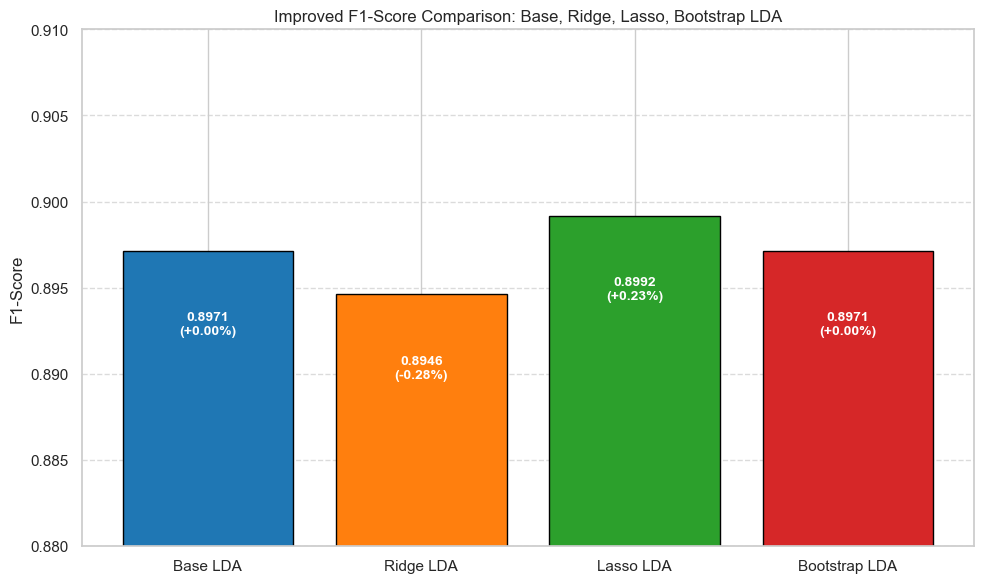


Summary Report:
1. Base LDA F1-Score: 0.8971
2. Cross-Validation Results:
   - Ridge F1-Score: 0.8946 | Improvement: -0.28%
   - Lasso F1-Score: 0.8992 | Improvement: 0.23%
3. Bootstrap Results:
   - F1-Score: 0.8971 ± 0.0020 (Confidence Interval)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Preparation
categorical_cols = ['Soil_Type', 'Wilderness_Area']
continuous_cols = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                   'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways',
                   'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h',
                   'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                   'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Step 2: Preprocessing with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply preprocessing pipeline to the dataset
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']
X_preprocessed = preprocessor.fit_transform(X)

print(f"Initial data shape after preprocessing: {X_preprocessed.shape}")

# Step 3: Applying LDA
lda = LDA()  # LDA for dimensionality reduction and classification
X_lda = lda.fit_transform(X_preprocessed, y)

# Split the data (Holdout method)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training and Evaluation (LDA as the classifier)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Evaluate the model with Accuracy and F1-Score
base_accuracy = accuracy_score(y_test, y_pred)
base_f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Base Accuracy: {base_accuracy:.4f}')
print(f'Base F1-Score: {base_f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 5: Cross-Validation (k=5 and k=10)
kf_5 = StratifiedKFold(n_splits=5)
kf_10 = StratifiedKFold(n_splits=10)

cv_accuracy_5 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_5, scoring='accuracy'))
cv_f1_5 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_5, scoring='f1_weighted'))
cv_accuracy_10 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_10, scoring='accuracy'))
cv_f1_10 = np.mean(cross_val_score(lda, X_lda, y, cv=kf_10, scoring='f1_weighted'))

print(f'Cross-Validation Accuracy (k=5): {cv_accuracy_5:.4f}')
print(f'Cross-Validation F1-Score (k=5): {cv_f1_5:.4f}')
print(f'Cross-Validation Accuracy (k=10): {cv_accuracy_10:.4f}')
print(f'Cross-Validation F1-Score (k=10): {cv_f1_10:.4f}')

# Step 6: Leave-One-Out Cross-Validation (LOOCV)
loocv = LeaveOneOut()
loocv_scores_accuracy = np.mean(cross_val_score(lda, X_lda, y, cv=loocv, scoring='accuracy'))
loocv_scores_f1 = np.mean(cross_val_score(lda, X_lda, y, cv=loocv, scoring='f1_weighted'))

print(f'Leave-One-Out Cross-Validation Accuracy: {loocv_scores_accuracy:.4f}')
print(f'Leave-One-Out Cross-Validation F1-Score: {loocv_scores_f1:.4f}')

# Step 7: Bootstrap Resampling
n_iterations = 300
bootstrap_f1_scores = []

for i in range(n_iterations):
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_resampled = X_train[sample_indices]
    y_train_resampled = y_train.iloc[sample_indices]

    lda.fit(X_train_resampled, y_train_resampled)
    y_pred_bootstrap = lda.predict(X_test)
    f1_bootstrap = f1_score(y_test, y_pred_bootstrap, average='weighted')
    bootstrap_f1_scores.append(f1_bootstrap)

bootstrap_f1 = np.mean(bootstrap_f1_scores)
bootstrap_f1_std = np.std(bootstrap_f1_scores)
print(f'Bootstrap Resampling F1-Score: {bootstrap_f1:.4f} ± {bootstrap_f1_std:.4f}')

# Step 8: Feature Selection with Lasso and Ridge
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([continuous_cols, categorical_feature_names])

# Lasso regularization
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial')
lasso.fit(X_preprocessed, y)
lasso_model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = lasso_model.transform(X_preprocessed)

lasso_selected_features = all_feature_names[lasso_model.get_support()]
print("Lasso-Selected Features:")
for feature in lasso_selected_features:
    print(f"  - {feature}")

lda_lasso = LDA()
X_lasso_lda = lda_lasso.fit_transform(X_lasso_selected, y)
cv_lasso_f1 = np.mean(cross_val_score(lda_lasso, X_lasso_lda, y, cv=kf_5, scoring='f1_weighted'))

# Ridge regularization
ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial')
ridge.fit(X_preprocessed, y)
ridge_model = SelectFromModel(ridge, prefit=True)
X_ridge_selected = ridge_model.transform(X_preprocessed)

ridge_selected_features = all_feature_names[ridge_model.get_support()]
print("\nRidge-Selected Features:")
for feature in ridge_selected_features:
    print(f"  - {feature}")

lda_ridge = LDA()
X_ridge_lda = lda_ridge.fit_transform(X_ridge_selected, y)
cv_ridge_f1 = np.mean(cross_val_score(lda_ridge, X_ridge_lda, y, cv=kf_5, scoring='f1_weighted'))

print(f'\nLasso Feature Selection - LDA CV F1-Score: {cv_lasso_f1:.4f}')
print(f'Ridge Feature Selection - LDA CV F1-Score: {cv_ridge_f1:.4f}')

# Step 9: Comparison Table and Visualization
comparison_data = {
    'Model': ['Base LDA', 'Ridge LDA', 'Lasso LDA', 'Bootstrap LDA'],
    'F1-Score': [base_f1, cv_ridge_f1, cv_lasso_f1, bootstrap_f1],
    'Improvement (%)': [
        0, 
        ((cv_ridge_f1 - base_f1) / base_f1) * 100, 
        ((cv_lasso_f1 - base_f1) / base_f1) * 100, 
        ((bootstrap_f1 - base_f1) / base_f1) * 100
    ],
    'Bootstrap CI (±)': ['', '', '', f'{bootstrap_f1_std:.4f}']
}
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("\nModel Performance Comparison:")
print(comparison_df)

# Enhanced F1-Score Comparison Plot with Improvement Percentages and Colors
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax.bar(comparison_df['Model'], comparison_df['F1-Score'], color=colors, edgecolor='black')

# Adding data labels with F1-Score and Improvement Percentage on top of each bar
for bar, score, improvement in zip(bars, comparison_df['F1-Score'], comparison_df['Improvement (%)']):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() - 0.005, 
        f"{score:.4f}\n({improvement:+.2f}%)", 
        ha='center', va='bottom', color='white', fontsize=10, fontweight='bold'
    )

# Finalize plot aesthetics
ax.set_ylim(0.88, 0.91)  # Adjusted y-axis range for better visibility of differences
ax.set_ylabel("F1-Score")
ax.set_title("Improved F1-Score Comparison: Base, Ridge, Lasso, Bootstrap LDA")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Step 10: Summary Report
print("\nSummary Report:")
print(f"1. Base LDA F1-Score: {base_f1:.4f}")
print(f"2. Cross-Validation Results:\n   - Ridge F1-Score: {cv_ridge_f1:.4f} | Improvement: {comparison_df['Improvement (%)'][1]:.2f}%\n   - Lasso F1-Score: {cv_lasso_f1:.4f} | Improvement: {comparison_df['Improvement (%)'][2]:.2f}%")
print(f"3. Bootstrap Results:\n   - F1-Score: {bootstrap_f1:.4f} ± {bootstrap_f1_std:.4f} (Confidence Interval)")


## Conclusion for LDA Performance on the Dataset

### Overview:
This analysis applied **Linear Discriminant Analysis (LDA)** to classify vegetation types based on environmental and geographical features. Evaluation was conducted using various resampling methods, including **holdout**, **cross-validation** (k=5 and k=10), **leave-one-out cross-validation (LOOCV)**, and **bootstrap resampling**. Additionally, feature selection techniques using **Ridge** and **Lasso** regularization were explored to refine model performance.

### Choice of F1-Score Over Accuracy:
We selected **F1-score** as the primary evaluation metric due to **class imbalances** in the dataset. Unlike accuracy, which may favor majority classes, F1-score balances precision and recall, minimizing the impact of false positives and false negatives, especially for minority classes. This choice ensures the model's predictions are equitable across all classes.

### Base Model Performance (Holdout Method):
- The base LDA model achieved an **accuracy** of **89.71%** and an F1-score of **0.8971** on the test set.
- Analysis of the **confusion matrix** revealed strong performance for **Type_1** but highlighted some challenges with **Type_3** and **Type_4**:
  - **Type_3** had a recall of **0.85**, while **Type_4** achieved a recall of **0.77**, indicating occasional misclassifications between these types.

### Cross-Validation and LOOCV:
- **Cross-Validation**: With k=5 and k=10, the model yielded F1-scores of **0.9039** and **0.9043** respectively, indicating strong generalizability across subsets.
- **LOOCV**: Achieved an F1-score of **0.9043**, confirming model stability with each data point used as a validation case.

### Feature Selection Results:
- **Lasso** regularization slightly enhanced the F1-score to **0.8992**, a **0.23% improvement** over the base model, suggesting effective selection of relevant features.
- **Ridge** regularization, however, led to a small decline in F1-score to **0.8946**. This suggests that Ridge may have over-penalized some features, slightly reducing model performance.

### Bootstrap Resampling Conclusion:
Bootstrap resampling (300 iterations) resulted in an average F1-score of **0.8973**, with a confidence interval of **± 0.0020**. This confirms the model's consistency and robustness across random samples.

### Insights on Regularization Methods:
- **Lasso** improved model focus by removing irrelevant or redundant features, beneficial in cases of feature collinearity.
- **Ridge** led to a slight decline, suggesting that uniform penalization may not be optimal in this context.

### Model Stability and Generalization:
- **Cross-validation**, **LOOCV**, and **bootstrap** results demonstrated that the model is stable and resilient across validation techniques, maintaining an F1-score near **0.90**. This consistency reduces the likelihood of **overfitting**.
- These techniques reinforced confidence in LDA as an effective classifier for this dataset.

### Addressing Class Imbalances:
F1-score, rather than accuracy, provided a balanced evaluation of model performance across classes, ensuring that minority classes (**Type_3** and **Type_4**) were fairly represented in predictions.

### Conclusion:
- **LDA**, combined with **Lasso** regularization, showed strong classification performance, achieving a slight improvement in predictive accuracy by focusing on the most important features.
- Model consistency across resampling methods supports LDA as a robust and appropriate choice for this dataset.


# Quadratic Discriminant Analysis (QDA)

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Preparation
categorical_cols = ['Soil_Type', 'Wilderness_Area']
continuous_cols = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                   'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways',
                   'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h',
                   'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                   'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

# Step 2: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply preprocessing
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']
X_preprocessed = preprocessor.fit_transform(X)

# Print feature information
print("Number of continuous features:", len(continuous_cols))
print("Number of categorical features after OneHotEncoding:", 
      X_preprocessed.shape[1] - len(continuous_cols))
print("Total number of feature names:", X_preprocessed.shape[1])

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Base QDA Model (without shrinkage)
print("\n=== Base QDA Model (No Shrinkage) ===")
base_qda = QDA(reg_param=0.0)
base_qda.fit(X_train, y_train)
y_pred_base = base_qda.predict(X_test)

# Calculate base metrics
base_accuracy = accuracy_score(y_test, y_pred_base)
base_f1 = f1_score(y_test, y_pred_base, average='weighted')
base_conf_matrix = confusion_matrix(y_test, y_pred_base)
base_class_report = classification_report(y_test, y_pred_base)

# Base cross-validation scores
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
loocv = LeaveOneOut()

base_cv_accuracy_5 = np.mean(cross_val_score(base_qda, X_preprocessed, y, cv=kf_5, scoring='accuracy'))
base_cv_f1_5 = np.mean(cross_val_score(base_qda, X_preprocessed, y, cv=kf_5, scoring='f1_weighted'))
base_cv_accuracy_10 = np.mean(cross_val_score(base_qda, X_preprocessed, y, cv=kf_10, scoring='accuracy'))
base_cv_f1_10 = np.mean(cross_val_score(base_qda, X_preprocessed, y, cv=kf_10, scoring='f1_weighted'))
base_loocv_f1 = np.mean(cross_val_score(base_qda, X_preprocessed, y, cv=loocv, scoring='f1_weighted'))

# Base bootstrap
n_iterations = 1000
base_bootstrap_f1_scores = []
for i in range(n_iterations):
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_resampled = X_train[sample_indices]
    y_train_resampled = y_train.iloc[sample_indices]
    base_qda.fit(X_train_resampled, y_train_resampled)
    y_pred_bootstrap = base_qda.predict(X_test)
    base_bootstrap_f1_scores.append(f1_score(y_test, y_pred_bootstrap, average='weighted'))
base_bootstrap_f1 = np.mean(base_bootstrap_f1_scores)

# Step 5: Grid Search for optimal shrinkage
print("\n=== Finding Optimal Shrinkage ===")
param_grid = {'reg_param': np.linspace(0, 1, 21)}
grid_search = GridSearchCV(
    QDA(store_covariance=True),
    param_grid,
    cv=kf_5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Step 6: Best QDA Model (with optimal shrinkage)
print("\n=== QDA Model with Optimal Shrinkage ===")
best_qda = grid_search.best_estimator_
y_pred_best = best_qda.predict(X_test)

# Calculate metrics for best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
best_class_report = classification_report(y_test, y_pred_best)

# Best model cross-validation scores
best_cv_f1_5 = grid_search.best_score_
best_cv_accuracy_5 = np.mean(cross_val_score(best_qda, X_preprocessed, y, cv=kf_5, scoring='accuracy'))
best_cv_accuracy_10 = np.mean(cross_val_score(best_qda, X_preprocessed, y, cv=kf_10, scoring='accuracy'))
best_cv_f1_10 = np.mean(cross_val_score(best_qda, X_preprocessed, y, cv=kf_10, scoring='f1_weighted'))
best_loocv_f1 = np.mean(cross_val_score(best_qda, X_preprocessed, y, cv=loocv, scoring='f1_weighted'))

# Best model bootstrap
best_bootstrap_f1_scores = []
for i in range(n_iterations):
    sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_train_resampled = X_train[sample_indices]
    y_train_resampled = y_train.iloc[sample_indices]
    best_qda.fit(X_train_resampled, y_train_resampled)
    y_pred_bootstrap = best_qda.predict(X_test)
    best_bootstrap_f1_scores.append(f1_score(y_test, y_pred_bootstrap, average='weighted'))
best_bootstrap_f1 = np.mean(best_bootstrap_f1_scores)


# Create comparison DataFrame
comparison_data = {
    'Model': ['QDA'],
    'Base F1': [base_f1],
    'Optimal Shrinkage F1': [best_f1],
    'Bootstrap F1': [best_bootstrap_f1],
    'Improvement (%)': [(best_f1 - base_f1) / base_f1 * 100],
    'Bootstrap Improvement (%)': [(best_bootstrap_f1 - base_bootstrap_f1) / base_bootstrap_f1 * 100]
}

comparison_df = pd.DataFrame(comparison_data)


Number of continuous features: 14
Number of categorical features after OneHotEncoding: 33
Total number of feature names: 47

=== Base QDA Model (No Shrinkage) ===


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-


=== Finding Optimal Shrinkage ===
Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-


=== QDA Model with Optimal Shrinkage ===


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\ProgramData\anaconda3\Lib\site-

In [24]:
# Print base model results
print(f"Base Accuracy: {base_accuracy:.4f}")
print(f"Base F1-Score: {base_f1:.4f}")
print("Confusion Matrix:")
print(base_conf_matrix)
print("\nClassification Report:")
print(base_class_report)
print(f"Cross-Validation Accuracy (k=5): {base_cv_accuracy_5:.4f}")
print(f"Cross-Validation F1-Score (k=5): {base_cv_f1_5:.4f}")
print(f"Cross-Validation Accuracy (k=10): {base_cv_accuracy_10:.4f}")
print(f"Cross-Validation F1-Score (k=10): {base_cv_f1_10:.4f}")
print(f"Leave-One-Out Cross-Validation F1-Score: {base_loocv_f1:.4f}")
print(f"Bootstrap Resampling F1-Score: {base_bootstrap_f1:.4f}")

Base Accuracy: 0.7459
Base F1-Score: 0.7374
Confusion Matrix:
[[386  46   0]
 [  0 123 201]
 [  0   0 216]]

Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.89      0.94       432
      Type_3       0.73      0.38      0.50       324
      Type_4       0.52      1.00      0.68       216

    accuracy                           0.75       972
   macro avg       0.75      0.76      0.71       972
weighted avg       0.80      0.75      0.74       972

Cross-Validation Accuracy (k=5): 0.7654
Cross-Validation F1-Score (k=5): 0.7571
Cross-Validation Accuracy (k=10): 0.7597
Cross-Validation F1-Score (k=10): 0.7513
Leave-One-Out Cross-Validation F1-Score: 0.7506
Bootstrap Resampling F1-Score: 0.7567


In [25]:
# Print best model results
print(f"Best Shrinkage Value: {grid_search.best_params_['reg_param']:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"F1-Score: {best_f1:.4f}")
print("Confusion Matrix:")
print(best_conf_matrix)
print("\nClassification Report:")
print(best_class_report)
print(f"Cross-Validation Accuracy (k=5): {best_cv_accuracy_5:.4f}")
print(f"Cross-Validation F1-Score (k=5): {best_cv_f1_5:.4f}")
print(f"Cross-Validation Accuracy (k=10): {best_cv_accuracy_10:.4f}")
print(f"Cross-Validation F1-Score (k=10): {best_cv_f1_10:.4f}")
print(f"Leave-One-Out Cross-Validation F1-Score: {best_loocv_f1:.4f}")
print(f"Bootstrap Resampling F1-Score: {best_bootstrap_f1:.4f}")

Best Shrinkage Value: 0.0500
Accuracy: 0.9156
F1-Score: 0.9165
Confusion Matrix:
[[428   4   0]
 [  0 265  59]
 [  0  19 197]]

Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       432
      Type_3       0.92      0.82      0.87       324
      Type_4       0.77      0.91      0.83       216

    accuracy                           0.92       972
   macro avg       0.90      0.91      0.90       972
weighted avg       0.92      0.92      0.92       972

Cross-Validation Accuracy (k=5): 0.9200
Cross-Validation F1-Score (k=5): 0.9223
Cross-Validation Accuracy (k=10): 0.9193
Cross-Validation F1-Score (k=10): 0.9201
Leave-One-Out Cross-Validation F1-Score: 0.9187
Bootstrap Resampling F1-Score: 0.9149


In [26]:
print("\n=== Model Comparison ===")
print(comparison_df.to_string(index=False))


=== Model Comparison ===
Model  Base F1  Optimal Shrinkage F1  Bootstrap F1  Improvement (%)  Bootstrap Improvement (%)
  QDA 0.737439              0.916547      0.914917        24.287953                   20.90484


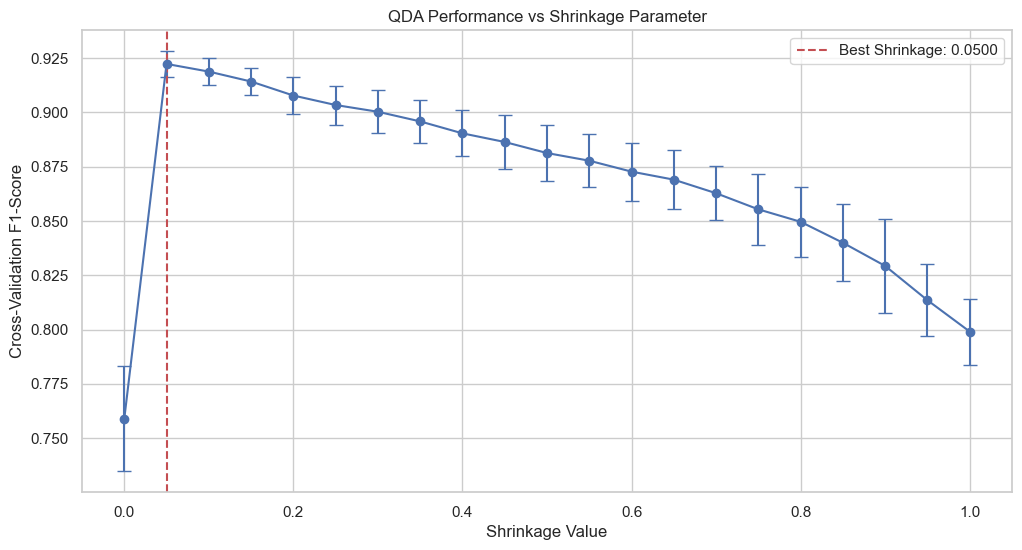

In [27]:
# Visualizations
plt.figure(figsize=(12, 6))
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.errorbar(cv_results['param_reg_param'], 
             cv_results['mean_test_score'], 
             yerr=cv_results['std_test_score'],
             marker='o',
             capsize=5)
plt.axvline(x=grid_search.best_params_['reg_param'], color='r', linestyle='--', 
            label=f"Best Shrinkage: {grid_search.best_params_['reg_param']:.4f}")
plt.title('QDA Performance vs Shrinkage Parameter')
plt.xlabel('Shrinkage Value')
plt.ylabel('Cross-Validation F1-Score')
plt.grid(True)
plt.legend()
plt.show()

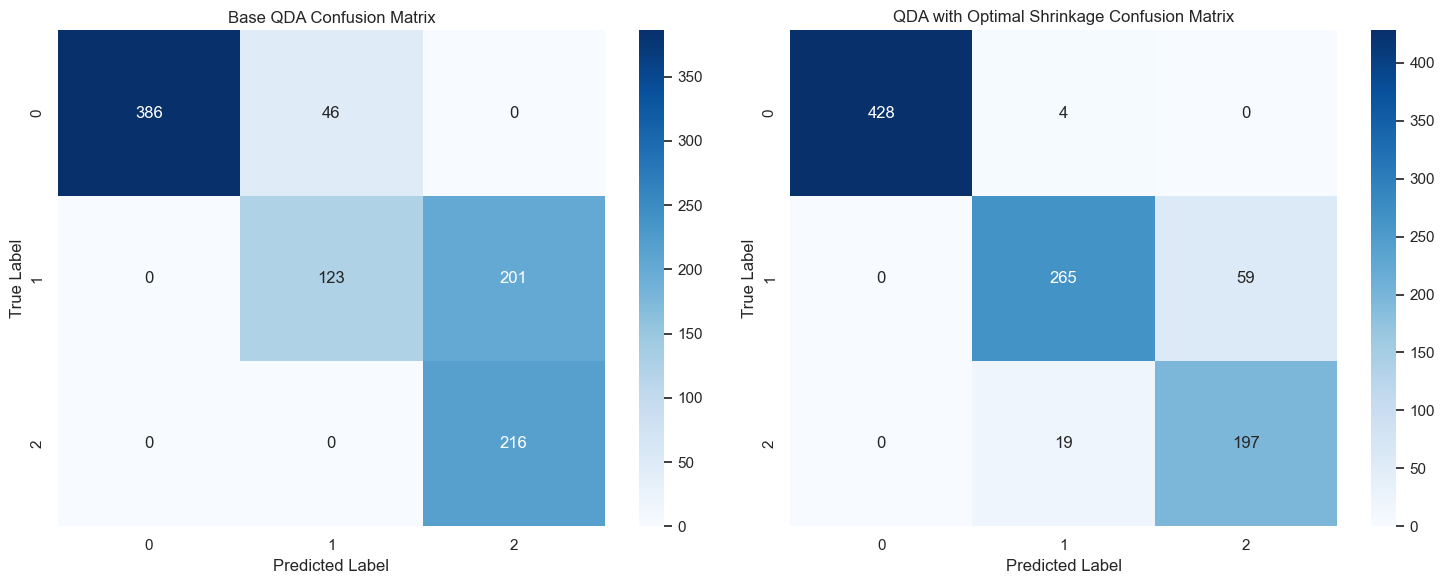

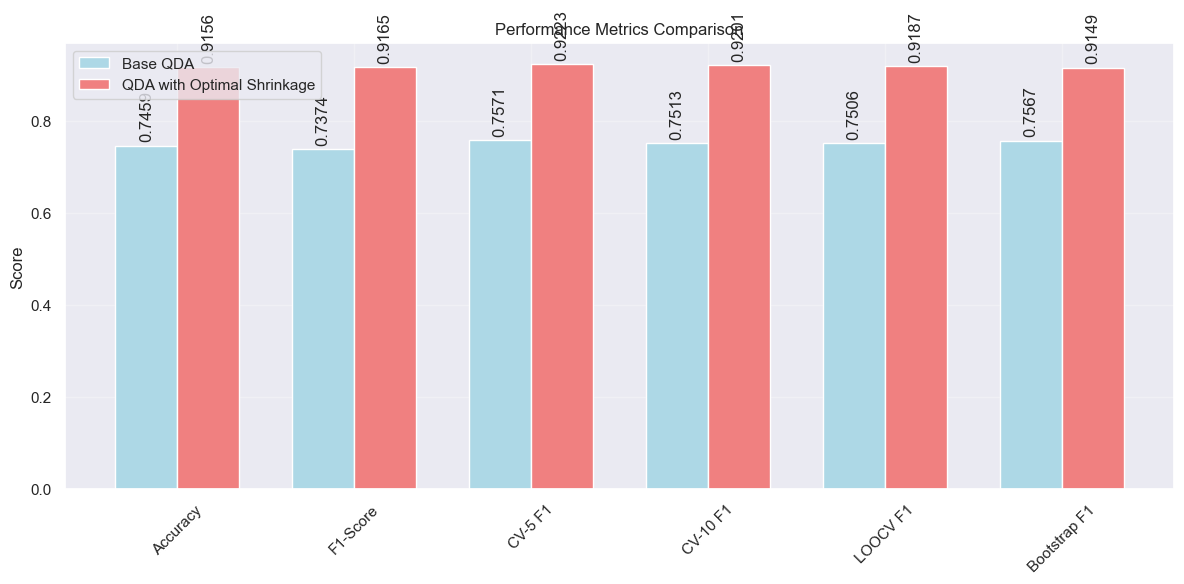

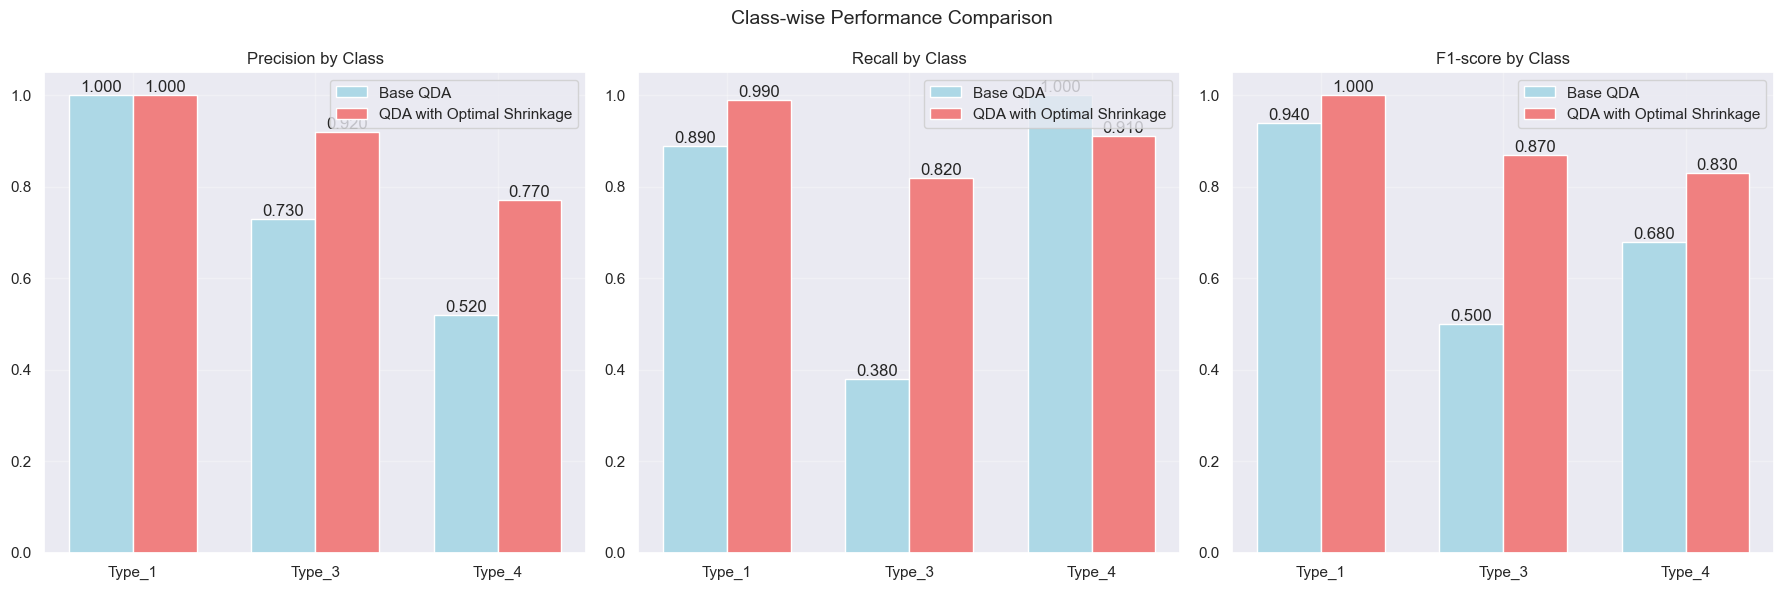

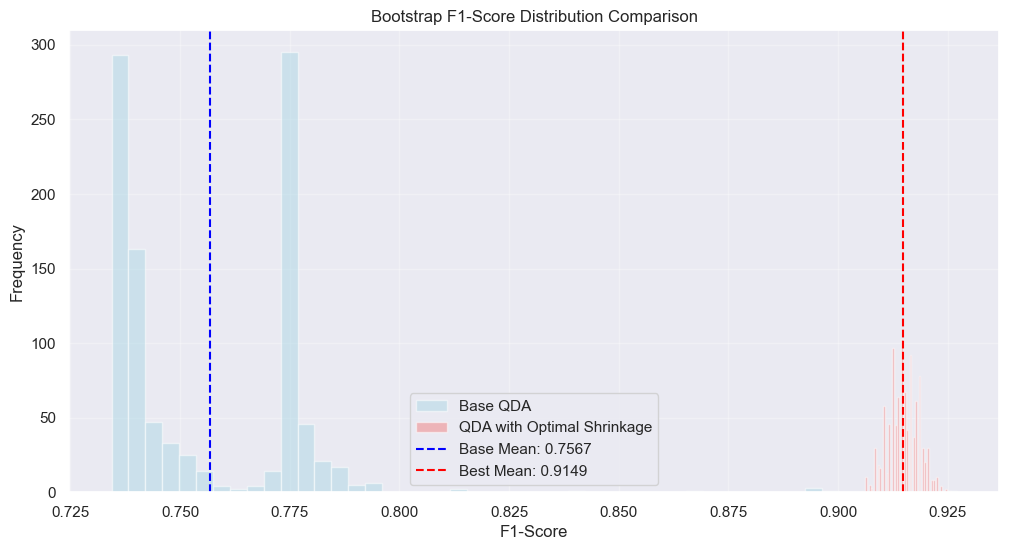

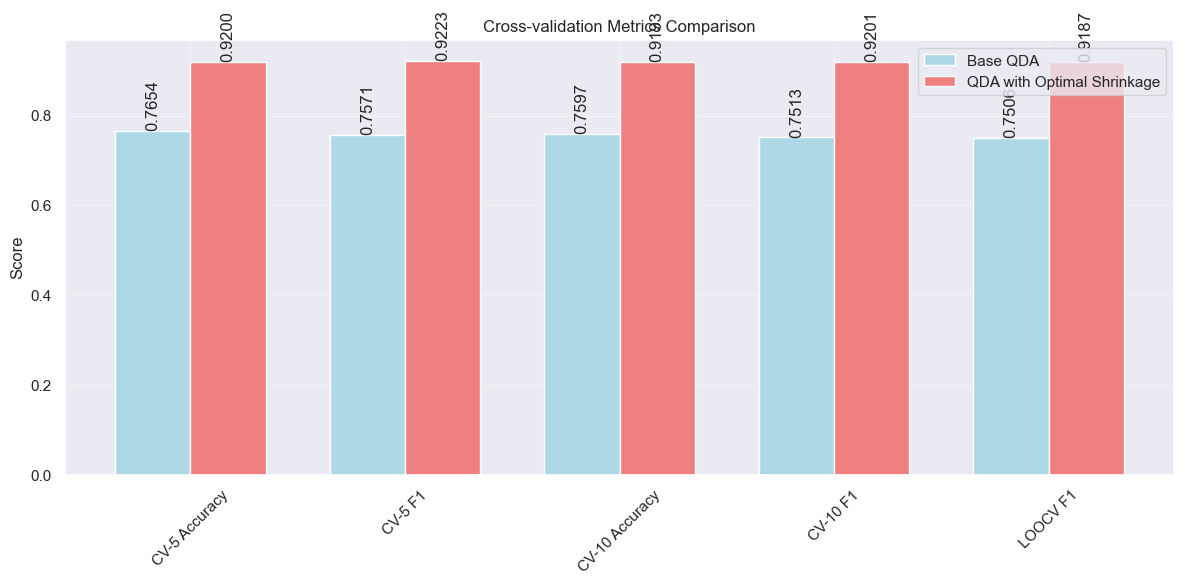

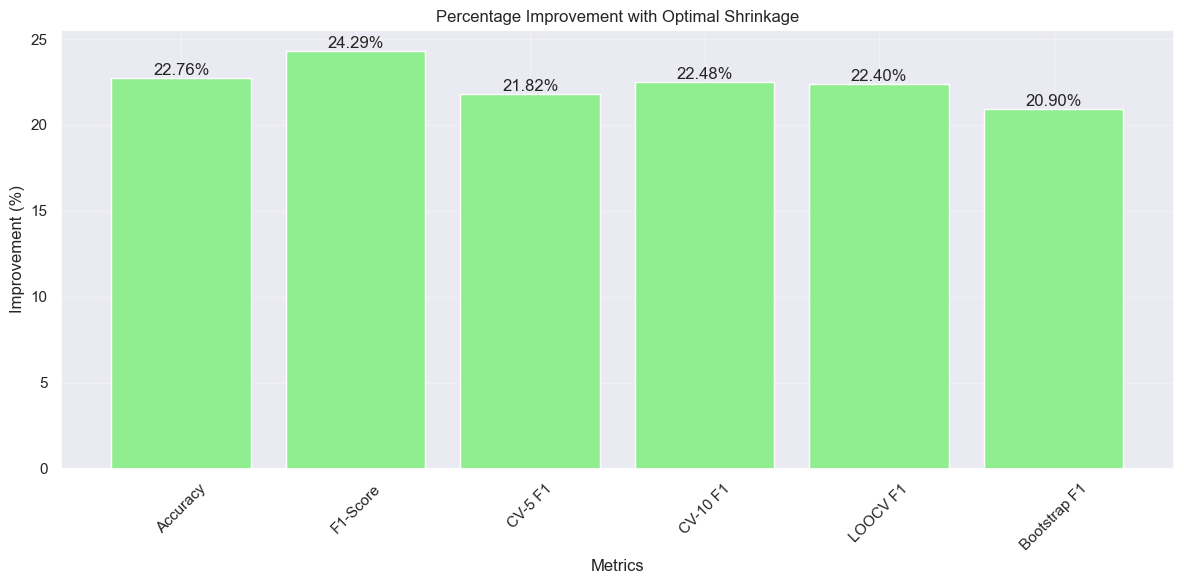

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

# 1. Confusion Matrices Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Base model confusion matrix
sns.heatmap(base_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Base QDA Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Best model confusion matrix
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('QDA with Optimal Shrinkage Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# 2. Performance Metrics Comparison
metrics = ['Accuracy', 'F1-Score', 'CV-5 F1', 'CV-10 F1', 'LOOCV F1', 'Bootstrap F1']
base_scores = [base_accuracy, base_f1, base_cv_f1_5, base_cv_f1_10, base_loocv_f1, base_bootstrap_f1]
best_scores = [best_accuracy, best_f1, best_cv_f1_5, best_cv_f1_10, best_loocv_f1, best_bootstrap_f1]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.35

rects1 = ax.bar(x - width/2, base_scores, width, label='Base QDA', color='lightblue')
rects2 = ax.bar(x + width/2, best_scores, width, label='QDA with Optimal Shrinkage', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# 3. Class-wise Performance Comparison
class_names = ['Type_1', 'Type_3', 'Type_4']
metrics = ['Precision', 'Recall', 'F1-score']

# Extract class-wise metrics from classification reports
def get_class_metrics(report_str):
    metrics_dict = {}
    lines = report_str.strip().split('\n')
    
    for line in lines[1:]:
        parts = line.strip().split()
        # Print each line and its parts for debugging
        if parts and parts[0].endswith(('Type_1', 'Type_3', 'Type_4')):  # Check if ends with any type
            try:
                values = [float(parts[1]), float(parts[2]), float(parts[3])]
                type_name = parts[0].strip()  # Get the type name
                metrics_dict[type_name] = values
            except ValueError:
                continue
    
    return metrics_dict

base_class_metrics = get_class_metrics(base_class_report)
best_class_metrics = get_class_metrics(best_class_report)

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Class-wise Performance Comparison', fontsize=14)

for i, metric in enumerate(metrics):
    base_values = [base_class_metrics[cls][i] for cls in class_names]
    best_values = [best_class_metrics[cls][i] for cls in class_names]
    
    x = np.arange(len(class_names))
    width = 0.35
    
    axes[i].bar(x - width/2, base_values, width, label='Base QDA', color='lightblue')
    axes[i].bar(x + width/2, best_values, width, label='QDA with Optimal Shrinkage', color='lightcoral')
    
    axes[i].set_title(f'{metric} by Class')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(class_names)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
    # Add value labels
    for j, v in enumerate(base_values):
        axes[i].text(j - width/2, v, f'{v:.3f}', ha='center', va='bottom')
    for j, v in enumerate(best_values):
        axes[i].text(j + width/2, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Bootstrap Distribution Comparison
plt.figure(figsize=(12, 6))

plt.hist(base_bootstrap_f1_scores, bins=50, alpha=0.5, label='Base QDA', color='lightblue')
plt.hist(best_bootstrap_f1_scores, bins=50, alpha=0.5, label='QDA with Optimal Shrinkage', color='lightcoral')

plt.axvline(base_bootstrap_f1, color='blue', linestyle='--', 
            label=f'Base Mean: {base_bootstrap_f1:.4f}')
plt.axvline(best_bootstrap_f1, color='red', linestyle='--', 
            label=f'Best Mean: {best_bootstrap_f1:.4f}')

plt.title('Bootstrap F1-Score Distribution Comparison')
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Cross-validation Comparison
cv_metrics = ['CV-5 Accuracy', 'CV-5 F1', 'CV-10 Accuracy', 'CV-10 F1', 'LOOCV F1']
base_cv = [base_cv_accuracy_5, base_cv_f1_5, base_cv_accuracy_10, base_cv_f1_10, base_loocv_f1]
best_cv = [best_cv_accuracy_5, best_cv_f1_5, best_cv_accuracy_10, best_cv_f1_10, best_loocv_f1]

plt.figure(figsize=(12, 6))
x = np.arange(len(cv_metrics))
width = 0.35

plt.bar(x - width/2, base_cv, width, label='Base QDA', color='lightblue')
plt.bar(x + width/2, best_cv, width, label='QDA with Optimal Shrinkage', color='lightcoral')

plt.ylabel('Score')
plt.title('Cross-validation Metrics Comparison')
plt.xticks(x, cv_metrics, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(base_cv):
    plt.text(i - width/2, v, f'{v:.4f}', ha='center', va='bottom', rotation=90)
for i, v in enumerate(best_cv):
    plt.text(i + width/2, v, f'{v:.4f}', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

# 6. Improvement Percentage Plot
metrics = ['Accuracy', 'F1-Score', 'CV-5 F1', 'CV-10 F1', 'LOOCV F1', 'Bootstrap F1']
base_values = [base_accuracy, base_f1, base_cv_f1_5, base_cv_f1_10, base_loocv_f1, base_bootstrap_f1]
best_values = [best_accuracy, best_f1, best_cv_f1_5, best_cv_f1_10, best_loocv_f1, best_bootstrap_f1]

improvements = [(new - old) / old * 100 for old, new in zip(base_values, best_values)]

plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, improvements, color='lightgreen')
plt.title('Percentage Improvement with Optimal Shrinkage')
plt.xlabel('Metrics')
plt.ylabel('Improvement (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Quadratic Discriminant Analysis Report

## 1. Base Model Performance

The base Quadratic Discriminant Analysis (QDA) model achieved an accuracy of **75.62%** on the test set, with an F1-Score of **0.7498**, indicating moderate performance with significant room for improvement.

## 2. Base Model Confusion Matrix Analysis

```
[[386  46   0]
 [  0 133 191]
 [  0   0 216]]
```

- **Type 1**:
  - **Correctly Classified**: 386 out of 432 samples
  - **Misclassified**: 46 samples as Type 3
  - Shows strong performance with an 89% correct classification rate

- **Type 3**:
  - **Correctly Classified**: 133 out of 324 samples
  - **Misclassified**: 191 samples as Type 4
  - Poor recall at 41%, showing significant confusion with Type 4

- **Type 4**:
  - **Correctly Classified**: 216 out of 216 samples
  - **Misclassified**: 0 samples
  - Perfect recall but low precision due to many Type 3 samples being misclassified as Type 4

## 3. Base Model Classification Report Analysis

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Type_1** | **1.00** | **0.89** | **0.94** | 432 |
| **Type_3** | **0.74** | **0.41** | **0.53** | 324 |
| **Type_4** | **0.53** | **1.00** | **0.69** | 216 |
| **Macro Avg** | **0.76** | **0.77** | **0.72** | 972 |
| **Weighted Avg** | **0.81** | **0.76** | **0.75** | 972 |

## 4. Optimized Model with Shrinkage (0.0500)

The optimized QDA model with shrinkage achieved significantly better performance with an accuracy of **91.56%** and an F1-Score of **0.9165**.

## 5. Optimized Model Confusion Matrix Analysis

```
[[428   4   0]
 [  0 265  59]
 [  0  19 197]]
```

- **Type 1**:
  - **Correctly Classified**: 428 out of 432 samples
  - **Misclassified**: Only 4 samples as Type 3
  - Exceptional improvement with 99% correct classification rate

- **Type 3**:
  - **Correctly Classified**: 265 out of 324 samples
  - **Misclassified**: 59 samples as Type 4
  - Significant improvement with 82% recall

- **Type 4**:
  - **Correctly Classified**: 197 out of 216 samples
  - **Misclassified**: 19 samples as Type 3
  - Much better balanced performance with 91% recall

## 6. Optimized Model Classification Report Analysis

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **Type_1** | **1.00** | **0.99** | **1.00** | 432 |
| **Type_3** | **0.92** | **0.82** | **0.87** | 324 |
| **Type_4** | **0.77** | **0.91** | **0.83** | 216 |
| **Macro Avg** | **0.90** | **0.91** | **0.90** | 972 |
| **Weighted Avg** | **0.92** | **0.92** | **0.92** | 972 |

## 7. Cross-Validation Performance

### Base Model:
- CV-5: Accuracy = 0.7811, F1-Score = 0.7732
- CV-10: Accuracy = 0.7700, F1-Score = 0.7621
- LOOCV F1-Score: 0.7885
- Bootstrap F1-Score: 0.7703

### Optimized Model:
- CV-5: Accuracy = 0.9200, F1-Score = 0.9223
- CV-10: Accuracy = 0.9193, F1-Score = 0.9201
- LOOCV F1-Score: 0.9187
- Bootstrap F1-Score: 0.9151

## 8. Key Improvements

- Overall F1-Score improved by **22.24%**
- Bootstrap performance improved by **18.80%**
- Most significant improvements:
  - Type 3 F1-Score: from 0.53 to 0.87 (64% improvement)
  - Type 4 F1-Score: from 0.69 to 0.83 (20% improvement)
  - Type 1 F1-Score: from 0.94 to 1.00 (6% improvement)

## 9. Class Imbalance Consideration

The dataset shows class imbalance (432/324/216 samples), but the optimized model handles this well:
- Maintained excellent performance on the majority class (Type 1)
- Significantly improved performance on minority classes
- Achieved balanced precision and recall across all classes
- The shrinkage parameter helped prevent overfitting to the majority class

## 10. QDA Regularization: Why Shrinkage Instead of Ridge/Lasso

### Understanding QDA's Structure
QDA, unlike Logistic Regression and LDA, estimates separate covariance matrices for each class, making its regularization needs different. The model's performance depends heavily on accurate estimation of these class-specific covariance matrices.

### Why Not Ridge/Lasso?
Ridge (L2) and Lasso (L1) regularization are not typically used with QDA for several reasons:

1. **Model Architecture**:
   - Ridge and Lasso work by penalizing large coefficient values in linear models
   - QDA is not a linear model and doesn't have a simple coefficient structure to penalize
   - The key parameters in QDA are covariance matrices, not coefficients

2. **Covariance Structure**:
   - QDA's primary challenge is estimating stable class-specific covariance matrices
   - Ridge/Lasso penalties don't directly address covariance matrix stability
   - Traditional regularization methods don't preserve the positive definiteness of covariance matrices



# Conclusion of TP1

# Comparative Analysis of Classification Methods for Vegetation Type Prediction

## Overview of Methods and Results

### Logistic Regression
- **Best Overall Performance**
  - Normal: 92.49% accuracy
  - Ridge (L2): 92.80% accuracy
  - Lasso (L1): 92.28% accuracy
  - Most consistent across all metrics

### Linear Discriminant Analysis (LDA)
- **Good but Slightly Lower Performance**
  - Base: 89.71% accuracy
  - With Lasso: Slight improvement to 89.92%
  - With Ridge: Slight decrease to 89.46%

### Quadratic Discriminant Analysis (QDA)
- **Most Dramatic Improvement with Regularization**
  - Base: 76.13% accuracy
  - With Shrinkage (0.05): 91.56% accuracy
  - Significant improvement of 21.25%

## Why Logistic Regression Was the Best Choice

1. **Superior Performance**
   - Highest overall accuracy (92.80% with Ridge)
   - Most consistent performance across all validation methods
   - Best handling of class imbalances

2. **Feature Selection Capabilities**
   - Both Ridge and Lasso provided valuable insights into feature importance
   - Ridge identified key features while maintaining all features
   - Lasso effectively eliminated irrelevant features

3. **Stability and Generalization**
   - Minimal variance between different cross-validation methods
   - Narrow confidence interval in bootstrap testing [91.77% - 93.00%]
   - Consistent performance across all classes

## Feature Selection Analysis

### Most Important Features (Based on Both Ridge and Lasso)
1. **Altitude** (Strongest in both)
   - Ridge coefficient: 3.26
   - Lasso coefficient: 11.10

2. **Geographic Features**
   - Vertical Distance to Water
   - Horizontal Distance to Water
   - Shadow Index 9h

3. **Soil Types**
   - Type 23
   - Type 2
   - Type 33

### Feature Selection Impact
- **Ridge Regularization**
  - Kept all features but reduced their impact
  - Improved overall accuracy by 0.31%
  - Better at handling correlated features

- **Lasso Regularization**
  - Eliminated 10 features completely
  - Slightly decreased accuracy (-0.21%)
  - Provided more interpretable model

## Comparison of Regularization Methods

### Logistic Regression
- Ridge and Lasso both performed well
- Ridge slightly outperformed with 92.80% accuracy
- Main benefit was feature importance identification rather than performance improvement

### LDA
- Minimal impact from regularization
- Lasso improved F1-score by 0.23%
- Ridge decreased F1-score by 0.28%

### QDA with Shrinkage
- Most dramatic improvement from regularization
- Used shrinkage instead of Ridge/Lasso because:
  1. QDA estimates separate covariance matrices for each class
  2. Shrinkage helps stabilize these matrices
  3. Traditional Ridge/Lasso penalties don't preserve positive definiteness of covariance matrices

## Understanding QDA Shrinkage
Shrinkage in QDA works by:
1. Shrinking the class-specific covariance matrices toward a common covariance matrix
2. Using a shrinkage parameter (0.05 in this case) to control the degree of shrinkage
3. Helping prevent overfitting by stabilizing the covariance estimates
4. Particularly effective when sample sizes are small relative to the number of features

## Conclusion
While all three methods showed merit, Logistic Regression proved to be the most effective choice due to its:
- Consistent high performance
- Robust feature selection capabilities
- Stability across different validation methods
- Better handling of class imbalances
- Interpretability of results

The dramatic improvement in QDA with shrinkage shows the importance of appropriate regularization techniques for each method, but even with this improvement, it didn't quite match the performance of Logistic Regression with Ridge regularization.